In [ ]:
# !pip install tensorflow==2.15.0

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!git clone https://github.com/Kedar59/Plant-Doc-Village-Dataset.git

Cloning into 'Plant-Doc-Village-Dataset'...
remote: Enumerating objects: 13740, done.
remote: Total 13740 (delta 0), reused 0 (delta 0), pack-reused 13740
Receiving objects: 100% (13740/13740), 1.00 GiB | 38.06 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (15290/15290), done.


In [ ]:
image_path="/content/Plant-Doc-Village-Dataset/train"

In [ ]:
train_image_path=image_path
valid_image_path="/content/Plant-Doc-Village-Dataset/test"
test_image_path="/content/Plant-Doc-Village-Dataset/test"

In [ ]:
class_names = os.listdir(image_path)
print(class_names)

['Tomato leaf', 'grape leaf black rot', 'Squash Powdery mildew leaf', 'Tomato leaf late blight', 'Bell_pepper leaf spot', 'Apple rust leaf', 'grape leaf', 'Corn rust leaf', 'Peach leaf', 'Soyabean leaf', 'Potato leaf early blight', 'Tomato mold leaf', 'Blueberry leaf', 'Cherry leaf', 'Apple Scab Leaf', 'Tomato leaf yellow virus', 'Corn leaf blight', 'Potato leaf late blight', 'Corn Gray leaf spot', 'Tomato leaf bacterial spot', 'Bell_pepper leaf', 'Apple leaf', 'Tomato leaf mosaic virus', 'Tomato Septoria leaf spot', 'Tomato Early blight leaf', 'Strawberry leaf', 'Raspberry leaf']


In [ ]:
data_dir = "/content/Plant-Doc-Village-Dataset"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/test"

In [ ]:
diseases = os.listdir(train_dir)
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Tomato leaf,54
grape leaf black rot,56
Squash Powdery mildew leaf,123
Tomato leaf late blight,101
Bell_pepper leaf spot,62
Apple rust leaf,79
grape leaf,57
Corn rust leaf,106
Peach leaf,103
Soyabean leaf,57


Text(0.5, 1.0, 'Images per each class of plant disease')

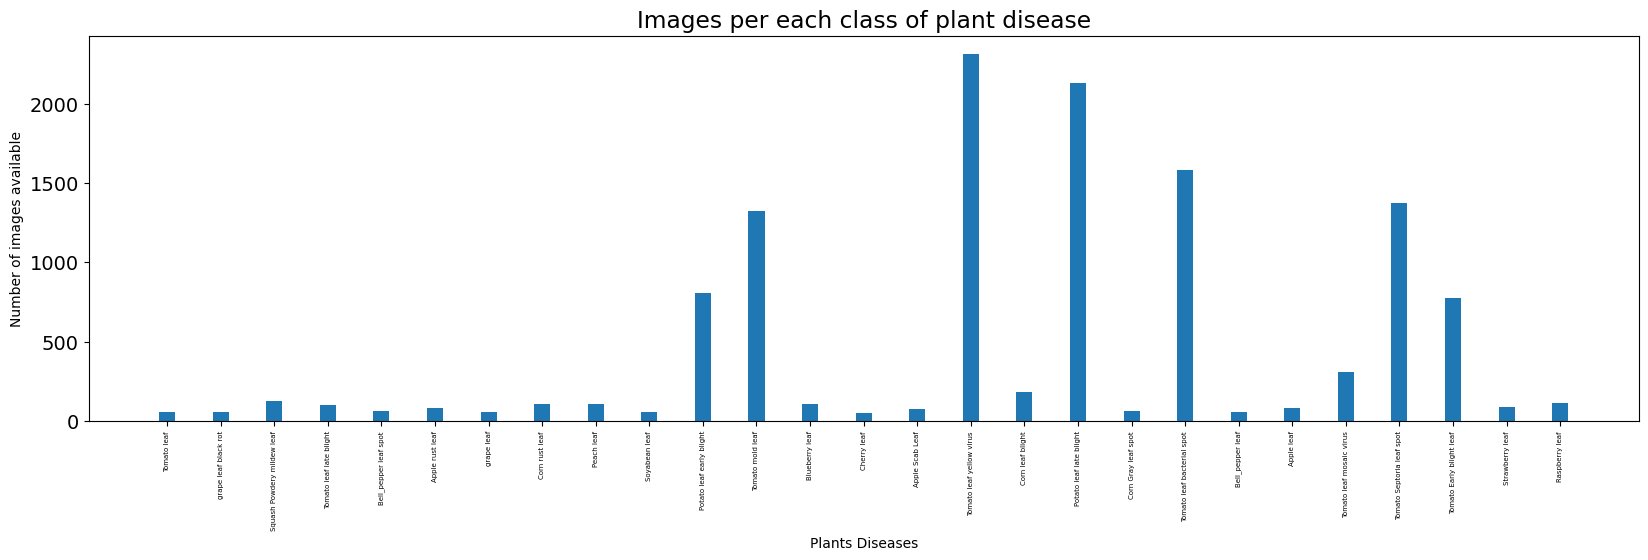

In [ ]:
index = [n for n in range(27)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants Diseases', fontsize=10)
plt.ylabel('Number of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [ ]:
train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)
val_datagen=ImageDataGenerator()

In [ ]:
train= train_datagen.flow_from_directory(train_dir,batch_size=128,target_size=(200,200),color_mode='rgb',class_mode='categorical',seed=42)
valid=val_datagen.flow_from_directory(valid_dir,batch_size=128,target_size=(200,200),color_mode='rgb',class_mode='categorical')

Found 12221 images belonging to 27 classes.
Found 3068 images belonging to 27 classes.


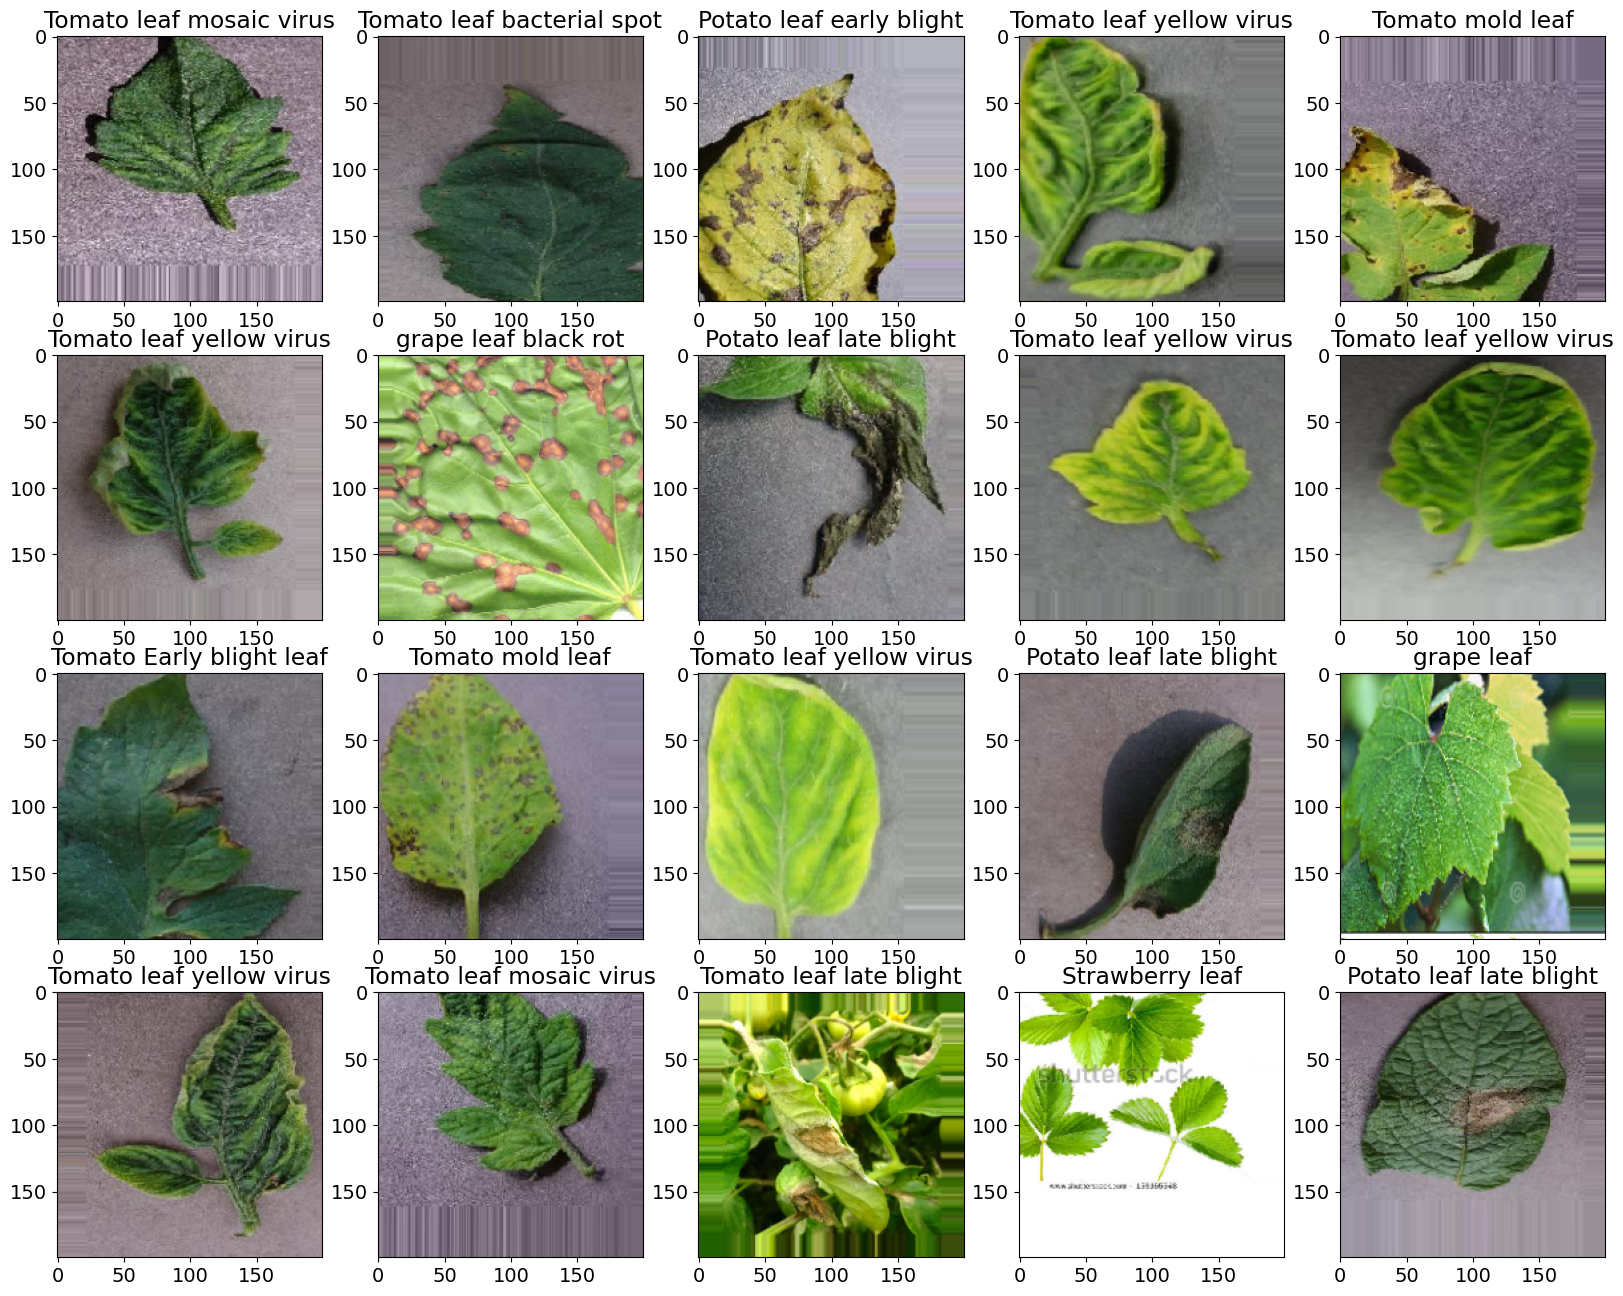

In [ ]:
classes=list(train.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train:
    for i in range(0,20):
        plt.subplot(5,5,i+1)
        plt.imshow(X_batch[i].astype(np.uint8))
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    plt.show()
    break

In [ ]:
base_model_tf=ResNet50(include_top=False,weights='imagenet',input_shape=(200,200,3),classes=27)
base_model_tf.trainable=False

pt=Input(shape=(200,200,3))
func=tensorflow.cast(pt,tensorflow.float32)
x=preprocess_input(func)
model_resnet=base_model_tf(x,training=False)
model_resnet=GlobalAveragePooling2D()(model_resnet)
model_resnet=Dense(256,activation='relu')(model_resnet)
model_resnet=Dropout(0.5)(model_resnet)
model_resnet=Dense(128,activation='relu')(model_resnet)
model_resnet=Dropout(0.5)(model_resnet)
model_resnet=Dense(64,activation='relu')(model_resnet)
model_resnet=Dropout(0.5)(model_resnet)
model_resnet=Dense(27,activation='softmax')(model_resnet)

Model_2=Model(inputs=pt,outputs=model_resnet)
Model_2.summary()
Model_2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history=Model_2.fit(train,validation_data=valid,epochs=100,verbose=1,callbacks=[callback])

In [ ]:
history

In [ ]:
Model_2.save("/content/drive/MyDrive/Model_2.h5")

In [ ]:
# !tar -zcvf disease_prediction.tgz Model_2.h5

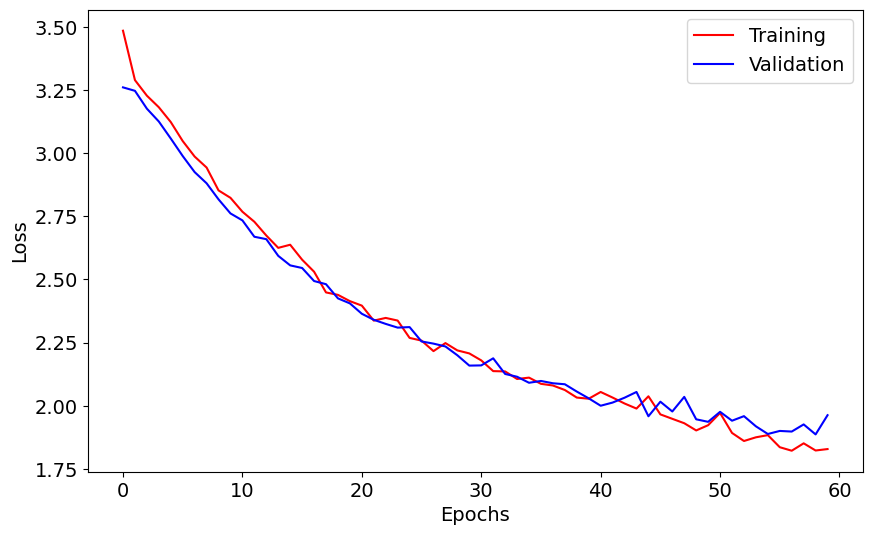

In [ ]:
import matplotlib.pyplot as plt
loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

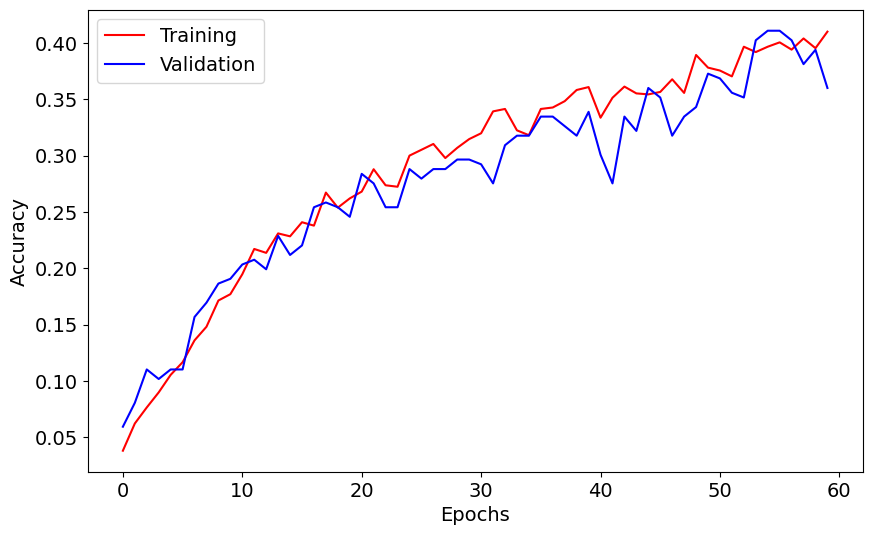

In [ ]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
batch_size = 128
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(200, 200),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

Found 12221 images belonging to 27 classes.


In [ ]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple Scab Leaf': 0, 'Apple leaf': 1, 'Apple rust leaf': 2, 'Bell_pepper leaf': 3, 'Bell_pepper leaf spot': 4, 'Blueberry leaf': 5, 'Cherry leaf': 6, 'Corn Gray leaf spot': 7, 'Corn leaf blight': 8, 'Corn rust leaf': 9, 'Peach leaf': 10, 'Potato leaf early blight': 11, 'Potato leaf late blight': 12, 'Raspberry leaf': 13, 'Soyabean leaf': 14, 'Squash Powdery mildew leaf': 15, 'Strawberry leaf': 16, 'Tomato Early blight leaf': 17, 'Tomato Septoria leaf spot': 18, 'Tomato leaf': 19, 'Tomato leaf bacterial spot': 20, 'Tomato leaf late blight': 21, 'Tomato leaf mosaic virus': 22, 'Tomato leaf yellow virus': 23, 'Tomato mold leaf': 24, 'grape leaf': 25, 'grape leaf black rot': 26}


In [ ]:
li = list(class_dict.keys())
print(li)

['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'grape leaf', 'grape leaf black rot']


In [ ]:
import numpy as np
import tensorflow as tf

# Load the model from the .h5 file
model = tf.keras.models.load_model("model/Model_2.h5")

# Load your image
img_path = ''  # Replace with the actual path to your image
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(200, 200))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
preprocessed_img = img_array  # No need for additional preprocessing since it's already preprocessed in training

li = ['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'grape leaf', 'grape leaf black rot']
plant_diseases = {
  "Apple Scab Leaf": {
    "prescription": "Apply fungicides containing captan or mancozeb.",
    "diagnosis": "Circular, scab-like lesions on leaves and fruit, often with a velvety texture.",
    "steps_to_be_taken": "Remove and destroy infected leaves and fruit. Improve air circulation around trees to reduce humidity."
  },
  "Apple leaf": {
    "prescription": "Maintain proper orchard hygiene, prune infected branches, and apply appropriate fungicides.",
    "diagnosis": "Yellowing or browning of leaves, sometimes with spots or lesions.",
    "steps_to_be_taken": "Monitor for signs of disease, improve tree nutrition, and control pests that may contribute to leaf damage."
  },
  "Apple rust leaf": {
    "prescription": "Apply fungicides containing sulfur or copper-based compounds.",
    "diagnosis": "Yellow or orange spots on leaves, often accompanied by raised lesions.",
    "steps_to_be_taken": "Remove and destroy infected leaves. Prune trees to improve air circulation."
  },
  "Bell_pepper leaf": {
    "prescription": "Apply appropriate fungicides and practice crop rotation.",
    "diagnosis": "Dark spots or lesions on leaves, which may lead to defoliation.",
    "steps_to_be_taken": "Remove and destroy infected plant material. Monitor for signs of disease in nearby plants."
  },
  "Bell_pepper leaf spot": {
    "prescription": "Apply fungicides containing copper or chlorothalonil.",
    "diagnosis": "Circular lesions with a dark border on leaves, which may enlarge over time.",
    "steps_to_be_taken": "Improve air circulation and avoid overhead irrigation to reduce leaf wetness."
  },
  "Blueberry leaf": {
    "prescription": "Apply fungicides labeled for blueberry diseases.",
    "diagnosis": "Reddish spots or lesions on leaves, sometimes accompanied by leaf curling or distortion.",
    "steps_to_be_taken": "Prune infected branches and provide adequate water and nutrients to the plant."
  },
  "Cherry leaf": {
    "prescription": "Apply appropriate fungicides and practice good orchard management.",
    "diagnosis": "Brown or black spots on leaves, which may lead to premature defoliation.",
    "steps_to_be_taken": "Remove infected leaves and improve air circulation to reduce leaf wetness."
  },
  "Corn Gray leaf spot": {
    "prescription": "Apply fungicides containing strobilurins or triazoles.",
    "diagnosis": "Grayish lesions with yellow halos on corn leaves, which may coalesce under favorable conditions.",
    "steps_to_be_taken": "Rotate crops, remove crop debris, and provide adequate spacing between plants."
  },
  "Corn leaf blight": {
    "prescription": "Apply appropriate fungicides and practice crop rotation.",
    "diagnosis": "Large, irregular lesions on corn leaves, which may lead to significant yield loss.",
    "steps_to_be_taken": "Remove and destroy infected plant material. Implement cultural practices to reduce disease spread."
  },
  "Corn rust leaf": {
    "prescription": "Apply fungicides containing triazoles or strobilurins.",
    "diagnosis": "Orange to reddish-brown pustules on corn leaves, often appearing in linear patterns.",
    "steps_to_be_taken": "Plant resistant varieties, remove infected debris, and practice crop rotation."
  },
  "Peach leaf": {
    "prescription": "Apply appropriate fungicides and maintain good orchard sanitation.",
    "diagnosis": "Purple or reddish spots on peach leaves, sometimes with a velvety appearance.",
    "steps_to_be_taken": "Prune infected branches, remove fallen leaves, and monitor for signs of disease."
  },
  "Potato leaf early blight": {
    "prescription": "Apply fungicides containing chlorothalonil or mancozeb.",
    "diagnosis": "Circular lesions with a target-like appearance on potato leaves, often with concentric rings.",
    "steps_to_be_taken": "Implement crop rotation, space plants adequately, and provide good soil drainage."
  },
  "Potato leaf late blight": {
    "prescription": "Apply fungicides containing chlorothalonil or copper-based compounds.",
    "diagnosis": "Large, irregular lesions on potato leaves, which may appear water-soaked in humid conditions.",
    "steps_to_be_taken": "Destroy infected plant material, avoid overhead irrigation, and improve air circulation."
  },
  "Raspberry leaf": {
    "prescription": "Apply appropriate fungicides labeled for raspberry diseases.",
    "diagnosis": "Purple or reddish spots on raspberry leaves, sometimes with yellow halos.",
    "steps_to_be_taken": "Prune infected canes, remove fallen leaves, and provide adequate plant spacing."
  },
  "Soyabean leaf": {
    "prescription": "Apply fungicides labeled for soybean diseases.",
    "diagnosis": "Yellow or brown spots on soybean leaves, which may lead to premature defoliation.",
    "steps_to_be_taken": "Implement crop rotation, plant disease-resistant varieties, and monitor for signs of disease."
  },
  "Squash Powdery mildew leaf": {
    "prescription": "Apply fungicides containing sulfur or potassium bicarbonate.",
    "diagnosis": "White powdery patches on squash leaves, often accompanied by leaf distortion.",
    "steps_to_be_taken": "Provide good air circulation, avoid overhead watering, and remove infected plant material."
  },
  "Strawberry leaf": {
    "prescription": "Apply appropriate fungicides labeled for strawberry diseases.",
    "diagnosis": "Brown or black spots on strawberry leaves, sometimes with yellow halos.",
    "steps_to_be_taken": "Prune infected runners, remove fallen leaves, and provide adequate plant spacing."
  },
  "Tomato Early blight leaf": {
    "prescription": "Apply fungicides containing chlorothalonil or copper-based compounds.",
    "diagnosis": "Circular, dark lesions with concentric rings on tomato leaves, often starting from the bottom of the plant.",
    "steps_to_be_taken": "Remove infected plant material, avoid overhead irrigation, and provide good air circulation."
  },
  "Tomato Septoria leaf spot": {
    "prescription": "Apply appropriate fungicides and practice crop rotation.",
    "diagnosis": "Small, circular lesions with dark centers on tomato leaves, often surrounded by yellow halos.",
    "steps_to_be_taken": "Prune lower leaves, remove infected debris, and provide adequate plant spacing."
  },
  "Tomato leaf": {
    "prescription": "Apply fungicides labeled for tomato diseases.",
    "diagnosis": "Varied symptoms including spots, lesions, and yellowing of leaves.",
    "steps_to_be_taken": "Monitor for signs of disease, improve plant nutrition, and control pests."
  },
  "Tomato leaf bacterial spot": {
    "prescription": "Apply copper-based fungicides or bactericides.",
    "diagnosis": "Water-soaked lesions with brown centers on tomato leaves, often accompanied by leaf yellowing.",
    "steps_to_be_taken": "Remove infected plant material, avoid overhead watering, and provide good air circulation."
  },
  "Tomato leaf late blight": {
    "prescription": "Apply appropriate fungicides containing chlorothalonil or copper-based compounds.",
    "diagnosis": "Large, irregular lesions with a water-soaked appearance on tomato leaves, often spreading rapidly in humid conditions.",
    "steps_to_be_taken": "Remove infected plant material, avoid overhead irrigation, and provide good air circulation."
  },
  "Tomato leaf mosaic virus": {
    "prescription": "There is no cure for viral infections. Control aphids and other vectors to prevent spread.",
    "diagnosis": "Mottled or distorted leaf patterns on tomato plants, sometimes with stunted growth.",
    "steps_to_be_taken": "Remove infected plants, control weeds, and use disease-free seedlings."
  },
  "Tomato leaf yellow virus": {
    "prescription": "There is no cure for viral infections. Control whiteflies and other vectors to prevent spread.",
    "diagnosis": "Yellowing of tomato leaves, sometimes with mosaic patterns and stunted growth.",
    "steps_to_be_taken": "Remove infected plants, control weeds, and use disease-resistant varieties."
  },
  "Tomato mold leaf": {
    "prescription": "Apply fungicides containing chlorothalonil or copper-based compounds.",
    "diagnosis": "Fuzzy white or gray patches on tomato leaves, often appearing in humid conditions.",
    "steps_to_be_taken": "Remove infected plant material, avoid overhead irrigation, and provide good air circulation."
  },
  "grape leaf": {
    "prescription": "Apply appropriate fungicides labeled for grape diseases.",
    "diagnosis": "Brown or reddish spots on grape leaves, sometimes with yellow halos.",
    "steps_to_be_taken": "Prune infected vines, remove fallen leaves, and provide adequate plant spacing."
  },
  "grape leaf black rot": {
    "prescription": "Apply fungicides containing copper or mancozeb.",
    "diagnosis": "Circular, black lesions with a reddish border on grape leaves, often leading to defoliation.",
    "steps_to_be_taken": "Prune infected vines, remove fallen leaves, and provide good air circulation."
  }
}


predictions = model.predict(preprocessed_img)
predicted_label_index = np.argmax(predictions)
predicted_label = li[predicted_label_index]
# print(predicted_label)

if predicted_label in plant_diseases:
    disease_info = plant_diseases[predicted_label]
    prescription = disease_info.get('prescription', 'Prescription not available')
    diagnosis = disease_info.get('diagnosis', 'Description not available')
    steps_to_be_taken = disease_info.get('steps_to_be_taken', 'No Steps To be Taken available')

    print(prescription)
    print(diagnosis)
    print(steps_to_be_taken)


else:
    temp = "Not Available in the dictionary"


1/1 [==============================] - 1s 1s/step
Apply appropriate fungicides labeled for strawberry diseases.
Brown or black spots on strawberry leaves, sometimes with yellow halos.
Prune infected runners, remove fallen leaves, and provide adequate plant spacing.
